<a href="https://colab.research.google.com/github/AdheFirmansyah/DataScience/blob/main/binaryclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

url = 'https://github.com/AdheFirmansyah/DataScience/blob/main/Dataset/SMSSpamCollection?raw=true'
df = pd.read_csv(url, 
                 sep='\t', 
                 header = None, names = ['label', 'sms'])
df.head()

,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [2]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [3]:
from sklearn.preprocessing import LabelBinarizer 

X=df['sms'].values
y=df['label'].values

lb = LabelBinarizer()
y = lb.fit_transform(y).ravel()
lb.classes_

array(['ham', 'spam'], dtype='<U4')

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

X_train

In [ ]:
X_test

TF-IDF extract text

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer 

vectorizer = TfidfVectorizer(stop_words = 'english')

X_trainTF = vectorizer.fit_transform( X_train)
X_testTF = vectorizer.transform(X_test)

In [ ]:
print(X_testTF)

In [9]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_trainTF, y_train)
y_pred = model.predict(X_testTF)

for pred, sms in zip(y_pred[:5], X_test[:5]):
  print(f'Predict: {pred} - SMS {sms}\n')

Predict: 0 - SMS Storming msg: Wen u lift d phne, u say "HELLO" Do u knw wt is d real meaning of HELLO?? . . . It's d name of a girl..! . . . Yes.. And u knw who is dat girl?? "Margaret Hello" She is d girlfrnd f Grahmbell who invnted telphone... . . . . Moral:One can 4get d name of a person, bt not his girlfrnd... G o o d n i g h t . . .@

Predict: 0 - SMS <Forwarded from 448712404000>Please CALL 08712404000 immediately as there is an urgent message waiting for you.

Predict: 0 - SMS And also I've sorta blown him off a couple times recently so id rather not text him out of the blue looking for weed

Predict: 0 - SMS Sir Goodmorning, Once free call me.

Predict: 0 - SMS All will come alive.better correct any good looking figure there itself..



Terminolgi Dasar :
1.  TP = Predict 1 = 1 dan ham 0 = 0
2.  TN = Precit 1 = bukan 0, dan 0 bukan 1
3.  PF = Predict 1 = 0, dan 0 = 1
4.  FN = Predict 1 = bukan 1 dan 0 bukan 0

In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score

matrix = confusion_matrix(y_test, y_pred)
matrix

array([[954,   1],
       [ 36, 124]])

In [14]:
tn, fp, fn, tp = matrix.ravel() #flatten
print(f'TN:{tn}')
print(f'FP:{fp}')
print(f'FN:{fn}')
print(f'FP:{tp}')

TN:954
FP:1
FN:36
FP:124


<function matplotlib.pyplot.show(*args, **kw)>

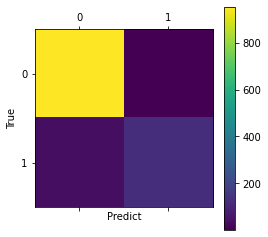

In [16]:
import matplotlib.pyplot as plt

plt.matshow(matrix)
plt.colorbar()
plt.ylabel('True')
plt.xlabel('Predict')
plt.show

In [19]:
accuracy_score(y_test, y_pred)

0.9668161434977578